In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
from alns import ALNS
from alns.accept import HillClimbing
from alns.stop import MaxRuntime
from alns.weights import SimpleWeights

from tsp_as.classes import Params, Solution
from tsp_as.destroy_operators import adjacent_destroy, random_destroy
from tsp_as.plot import plot_graph
from tsp_as.repair_operators import greedy_insert


def solve(params, seed: int, max_runtime: int, **kwargs):
    """
    Solve the instance.
    """
    rng = rnd.default_rng(seed)

    alns = ALNS(rng)
    alns.add_destroy_operator(random_destroy)
    alns.add_destroy_operator(adjacent_destroy)
    alns.add_repair_operator(greedy_insert)

    init = Solution(params, np.arange(1, params.dimension).tolist())  # ordered
    weights = SimpleWeights([5, 2, 1, 0.5], 2, 2, 0.8)
    accept = HillClimbing()
    stop = MaxRuntime(max_runtime)

    res = alns.iterate(init, weights, accept, stop, **kwargs)
    stats = res.statistics

    return (
        res.best_state,
        len(stats.objectives),
        round(stats.total_runtime, 3),
    )

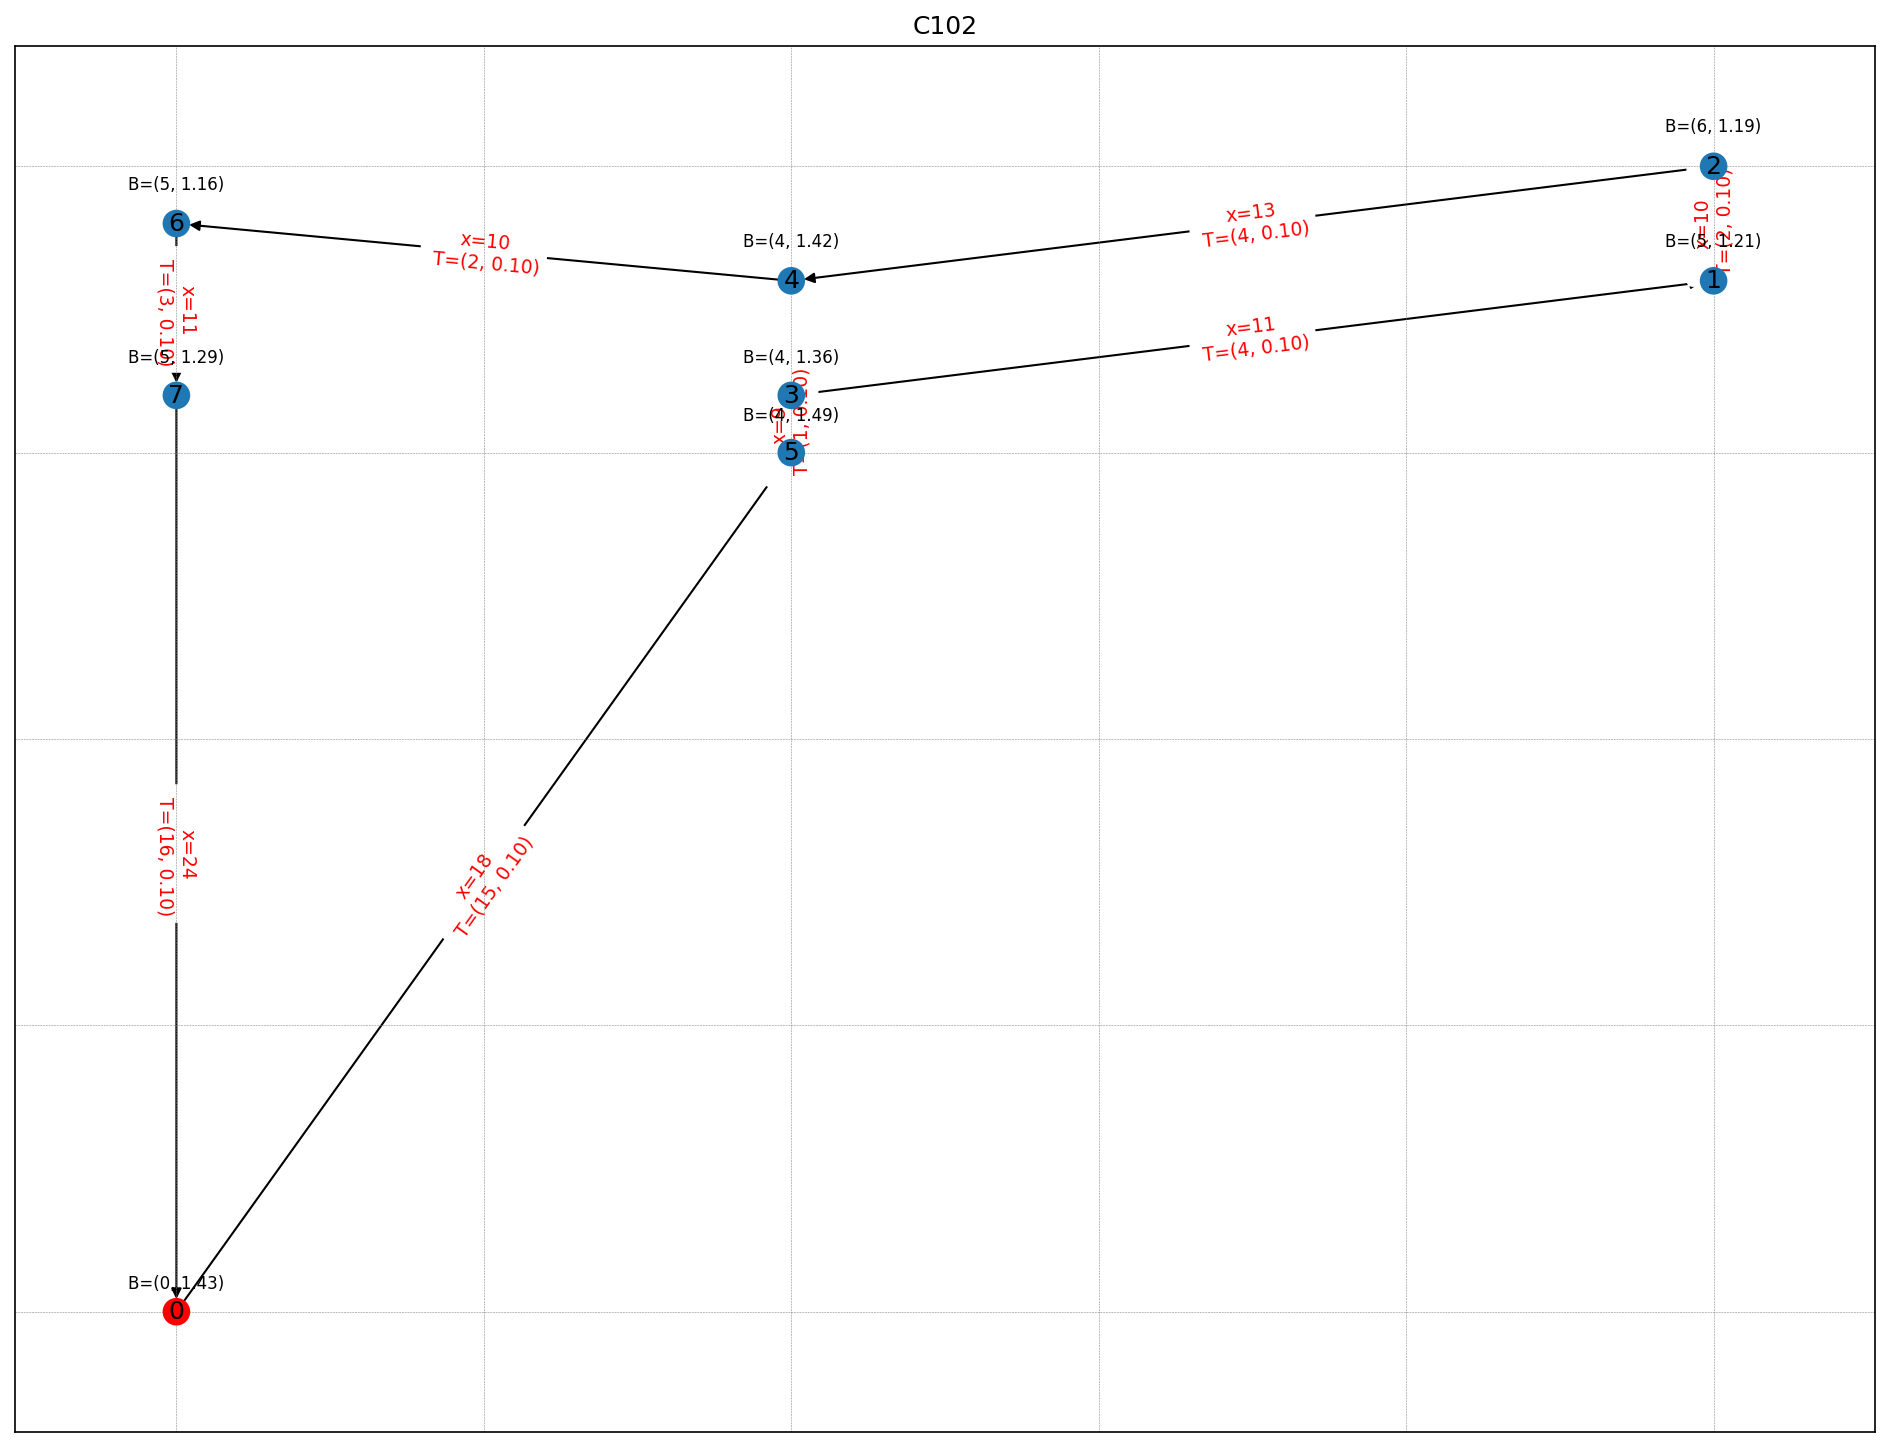

In [13]:
# Set path to instance (it uses only coordinates)
path = Path("instances/solomon/C102.txt")

# Specify instance characteristics
parameters = {
    "max_dim": 8,  # number of locations
    # TODO explicit distance matrix to support pure appointment scheduling problem
    "distances_scv_min": 0.1,
    "distances_scv_max": 0.1,
    # TODO assign SCV explictly for service times (not needed for distances)
    # "service_scvs": np.array([0.1])
    "service_scv_min": 1.1,
    "service_scv_max": 1.5,
    "omega_travel": 0.2,
    "omega_idle": 0.2,
    "omega_wait": 0.6,
    "objective": "hto",  # hto, htt, to, htl
}

# TODO select algorithm


rng = rnd.default_rng(1)
params = Params.from_solomon(path, rng, **parameters)

# Solve the instance and obtain best solution
seed = 42
best, n_iters, runtime = solve(params, seed, max_runtime=5)

# Plot the solutions and save to file
fig, ax = plt.subplots(figsize=[16, 12], dpi=150)
plot_graph(ax, params, best)
plt.show()

fig.savefig(f"tmp/{path.stem}-dim{parameters['max_dim']}.svg")
plt.close()
# TODO final objective value
# TODO individual objective values before the sum
# TODO means must be travel times + previous service time

In [14]:
best.cost

24.44923577375146

In [30]:
params.service[np.newaxis, :].T

array([[0.        ],
       [5.25173975],
       [6.06927188],
       [4.16695226],
       [4.34760208],
       [4.48931781],
       [5.31397428],
       [4.73159802]])

In [21]:
np.diag(params.means)

array([0.        , 5.25173975, 6.06927188, 4.16695226, 4.34760208,
       4.48931781, 5.31397428, 4.73159802])